### Importing required libraries

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

### Import the dataset

In [5]:
# importing datasets
dataset= pd.read_csv('dataset.csv')

In [6]:
dataset.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


### Performing preliminary analysis

In [7]:
# analysing the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   bed_temperature     66 non-null     int64  
 6   print_speed         66 non-null     int64  
 7   material            66 non-null     object 
 8   fan_speed           66 non-null     int64  
 9   roughness           66 non-null     int64  
 10  tension_strenght    66 non-null     int64  
 11  elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB


In [8]:
dataset.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.098182,5.583333,54.727273,222.272727,70.378788,64.242424,48.530303,160.545455,19.757576,1.625000
std,0.062608,2.952943,27.545512,15.094110,8.651839,28.598580,35.834328,95.703899,9.202108,0.762498
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,21.000000,4.000000,0.400000
25%,0.052500,3.000000,40.000000,210.000000,65.000000,40.000000,25.000000,78.250000,12.000000,1.025000
50%,0.100000,6.000000,50.000000,220.000000,70.000000,60.000000,50.000000,149.500000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,60.000000,75.000000,220.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,100.000000,120.000000,100.000000,368.000000,38.000000,3.300000


In [9]:
dataset.corr()

/var/folders/l5/wmf9pb4s265b_jgzm5l9tq7h0000gn/T/ipykernel_80984/2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1.000000,-0.282933,-0.013763,-0.030562,-0.120838,0.044329,-0.040571,0.773096,0.325276,0.482438
wall_thickness,-0.282933,1.000000,0.025534,-0.130299,0.061974,-0.341273,0.050462,-0.240834,0.336492,0.150234
infill_density,-0.013763,0.025534,1.000000,0.213167,0.119221,-0.048114,0.035763,0.037378,0.278869,0.118003
nozzle_temperature,-0.030562,-0.130299,0.213167,1.000000,0.552889,0.031671,0.580967,0.302494,-0.392501,-0.524996
bed_temperature,-0.120838,0.061974,0.119221,0.552889,1.000000,-0.067218,0.906690,0.106675,-0.247139,-0.310455
print_speed,0.044329,-0.341273,-0.048114,0.031671,-0.067218,1.000000,-0.000353,0.212711,-0.195963,-0.213770
fan_speed,-0.040571,0.050462,0.035763,0.580967,0.906690,-0.000353,1.000000,0.202488,-0.299644,-0.347389
roughness,0.773096,-0.240834,0.037378,0.302494,0.106675,0.212711,0.202488,1.000000,0.038829,0.073683
tension_strenght,0.325276,0.336492,0.278869,-0.392501,-0.247139,-0.195963,-0.299644,0.038829,1.000000,0.834834
elongation,0.482438,0.150234,0.118003,-0.524996,-0.310455,-0.213770,-0.347389,0.073683,0.834834,1.000000


In [10]:
# handling missing values
dataset.isnull().any()

layer_height          False
wall_thickness        False
infill_density        False
infill_pattern        False
nozzle_temperature    False
bed_temperature       False
print_speed           False
material              False
fan_speed             False
roughness             False
tension_strenght      False
elongation            False
dtype: bool

In [11]:
dataset.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

### Performing data visualization

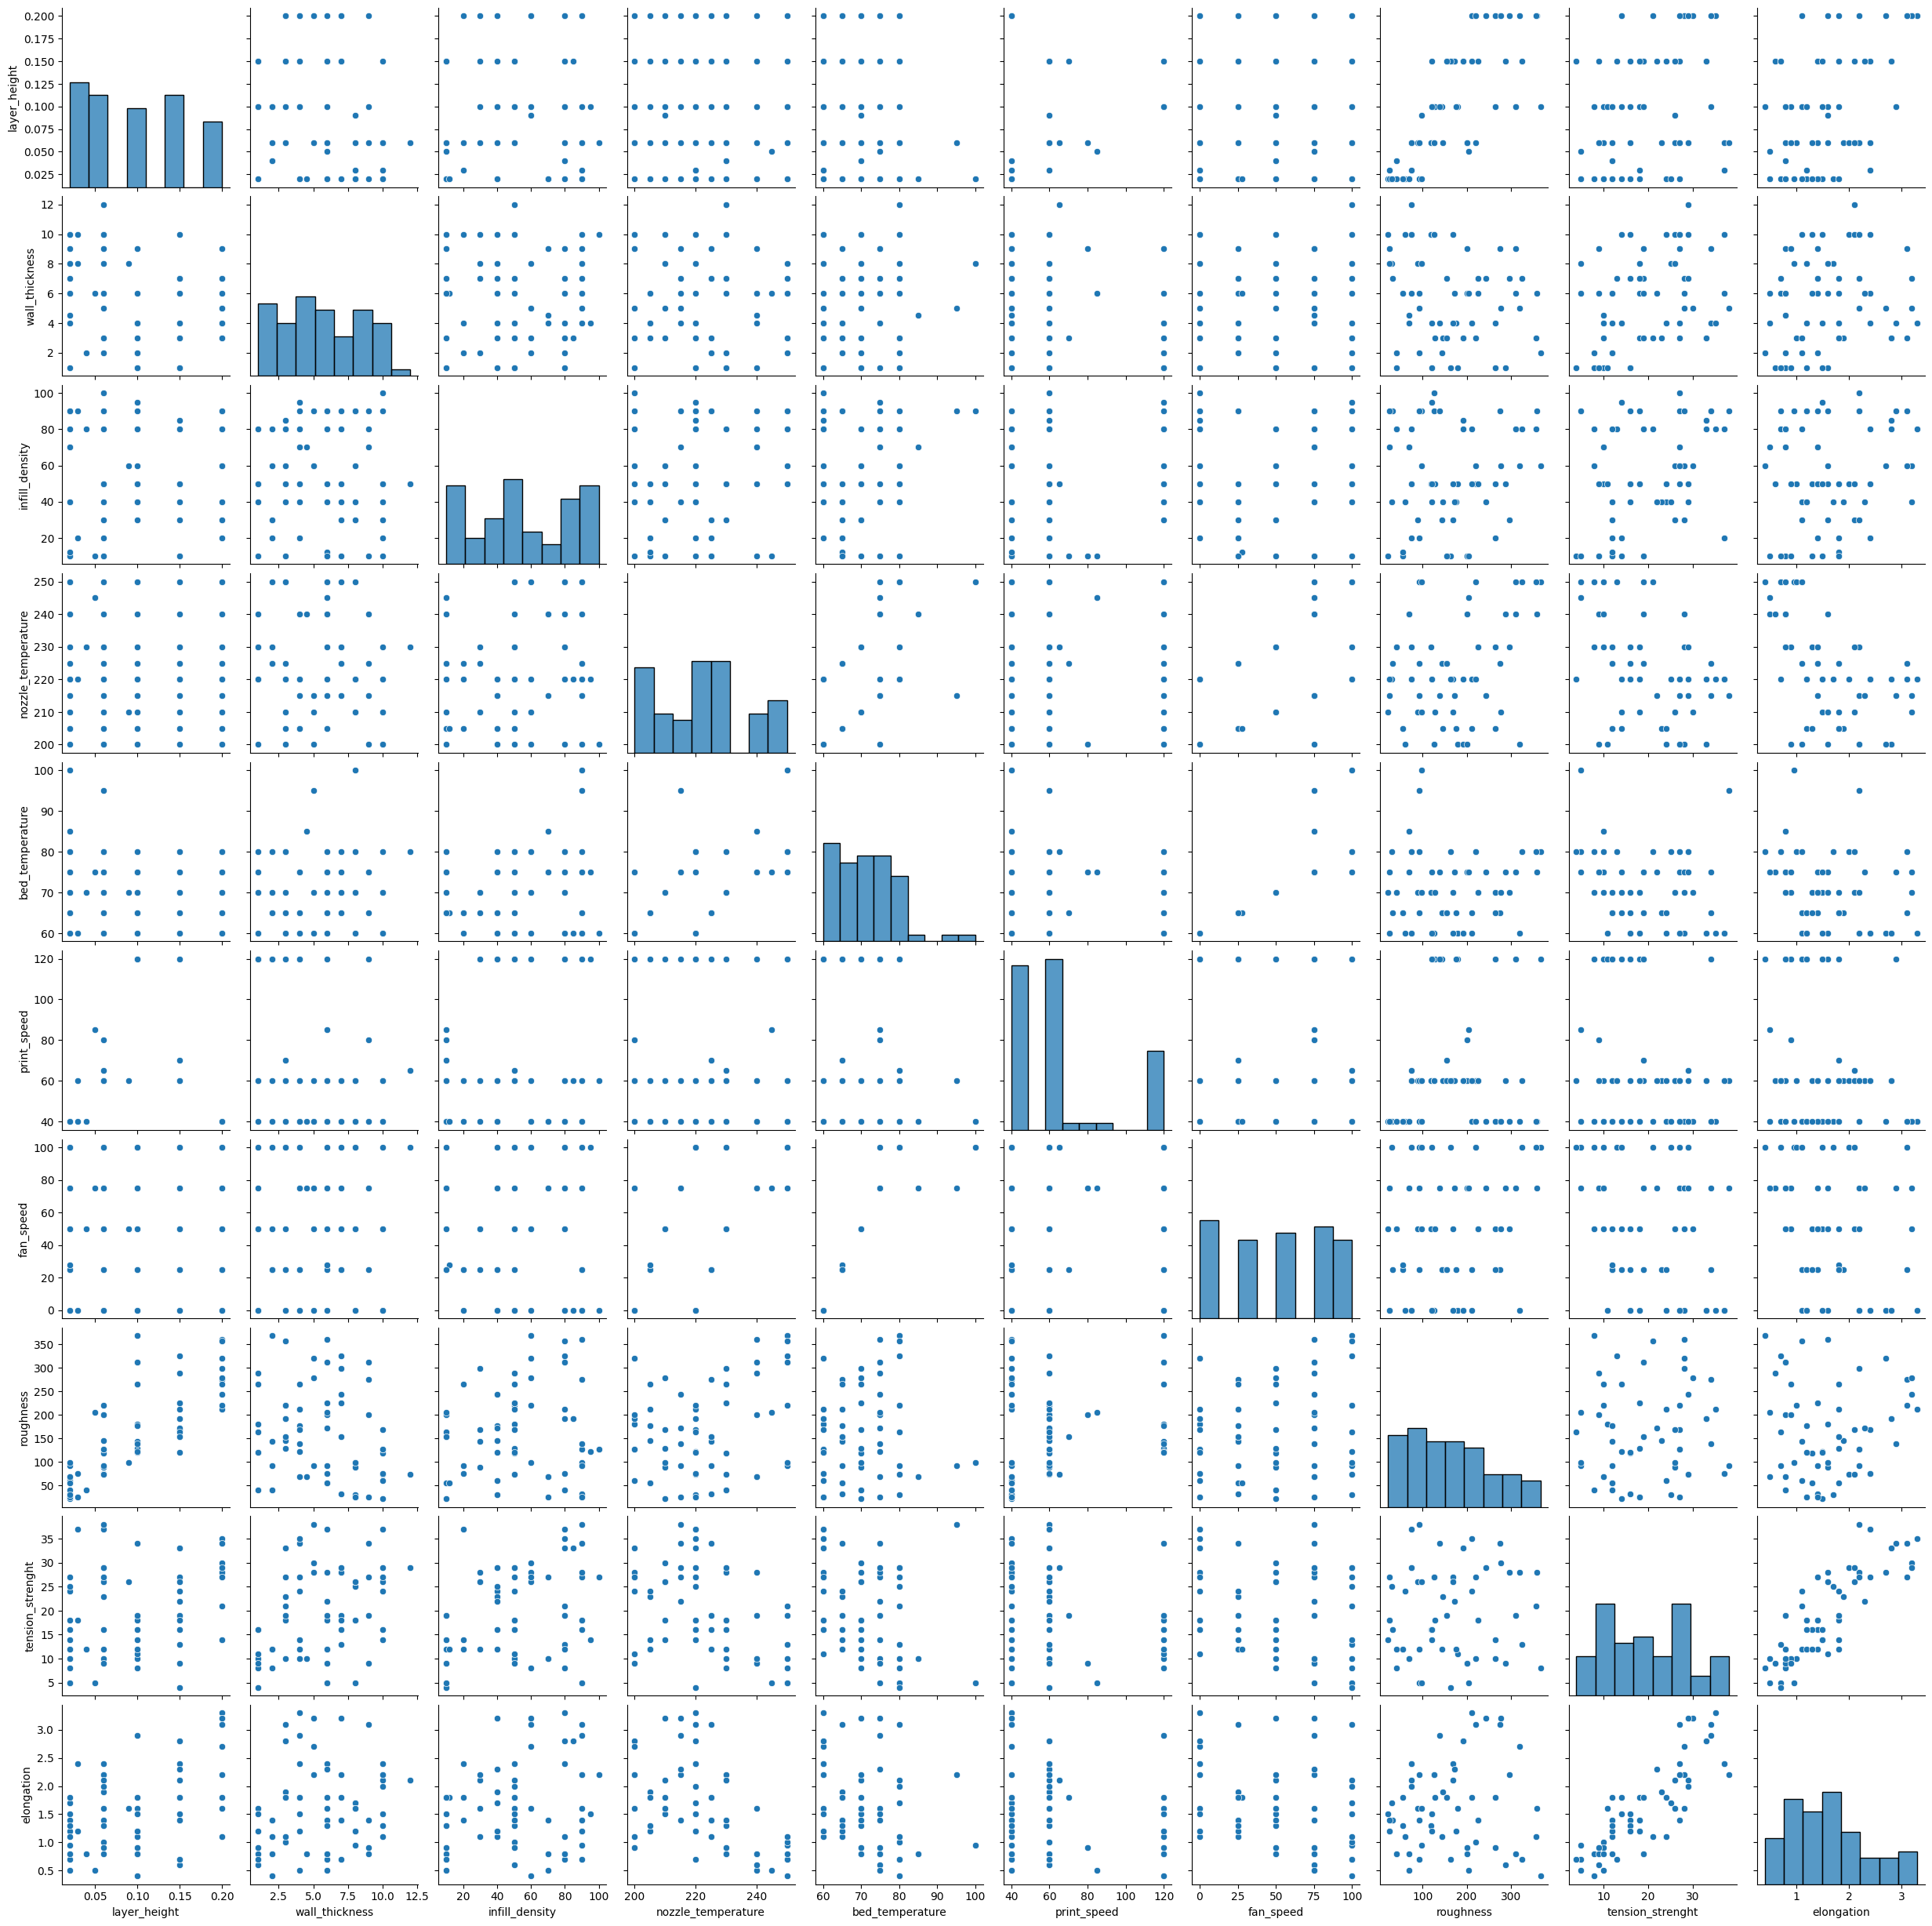

In [12]:
sns.pairplot(dataset)

<AxesSubplot: >

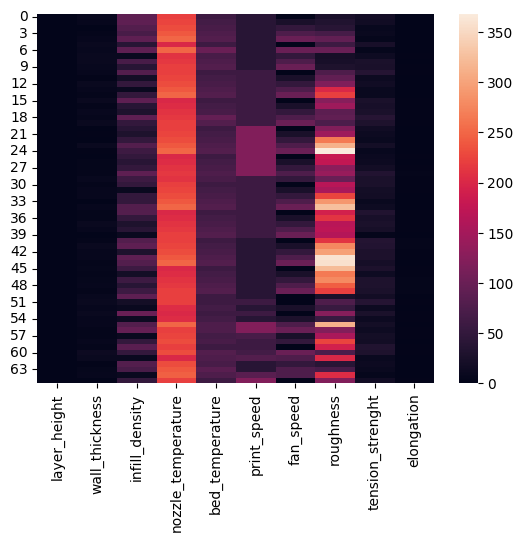

In [13]:
sns.heatmap(dataset[['layer_height', 'wall_thickness', 'infill_density','nozzle_temperature', 'bed_temperature', 
                     'print_speed','fan_speed', 'roughness', 'tension_strenght', 'elongation']])

In [14]:
plt.show()

### Categorical Encoding

In [15]:
le=LabelEncoder()
dataset.infill_pattern=le.fit_transform(dataset.infill_pattern)
dataset.material=le.fit_transform(dataset.material)

In [16]:
dataset.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7.0,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1.0,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4.0,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6.0,90,0,250,80,40,0,100,92,5,0.7


<AxesSubplot: >

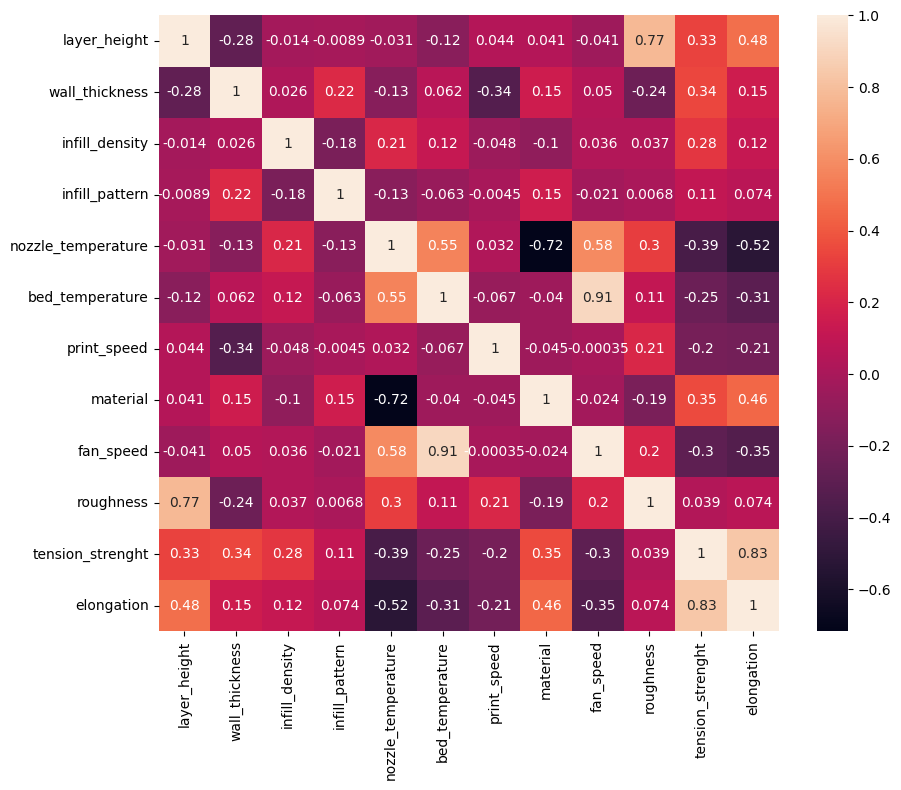

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)

In [18]:
plt.show()

### Splitting into dependent and independent variables

In [19]:
y=dataset['material']
X=dataset.drop(columns=['material'],axis=1)

### Feature scaling

In [20]:
name=X.columns
name

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

In [21]:

scale=MinMaxScaler()

In [22]:
X_scaled=scale.fit_transform(X)
X_scaled

array([[0.        , 0.63636364, 0.88888889, 0.        , 0.4       ,
        0.        , 0.        , 0.        , 0.01152738, 0.41176471,
        0.27586207],
       [0.        , 0.54545455, 0.88888889, 1.        , 0.5       ,
        0.125     , 0.        , 0.25      , 0.03170029, 0.35294118,
        0.34482759],
       [0.        , 0.        , 0.77777778, 0.        , 0.6       ,
        0.25      , 0.        , 0.5       , 0.05475504, 0.11764706,
        0.13793103],
       [0.        , 0.27272727, 0.66666667, 1.        , 0.8       ,
        0.375     , 0.        , 0.75      , 0.13544669, 0.17647059,
        0.03448276],
       [0.        , 0.45454545, 0.88888889, 0.        , 1.        ,
        0.5       , 0.        , 1.        , 0.20461095, 0.02941176,
        0.10344828],
       [0.        , 0.81818182, 0.33333333, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.11239193, 0.58823529,
        0.24137931],
       [0.        , 0.63636364, 0.88888889, 0.        , 1.

In [23]:
X=pd.DataFrame(X_scaled,columns=name)
X

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.000000,0.636364,0.888889,0.0,0.4,0.000,0.0000,0.00,0.011527,0.411765,0.275862
1,0.000000,0.545455,0.888889,1.0,0.5,0.125,0.0000,0.25,0.031700,0.352941,0.344828
2,0.000000,0.000000,0.777778,0.0,0.6,0.250,0.0000,0.50,0.054755,0.117647,0.137931
3,0.000000,0.272727,0.666667,1.0,0.8,0.375,0.0000,0.75,0.135447,0.176471,0.034483
4,0.000000,0.454545,0.888889,0.0,1.0,0.500,0.0000,1.00,0.204611,0.029412,0.103448
...,...,...,...,...,...,...,...,...,...,...,...
61,0.222222,0.727273,0.000000,1.0,0.0,0.375,0.5000,0.75,0.515850,0.147059,0.172414
62,0.111111,0.090909,0.777778,0.0,0.6,0.250,0.0000,0.50,0.054755,0.235294,0.137931
63,0.000000,0.318182,0.666667,1.0,0.8,0.625,0.0000,0.75,0.135447,0.176471,0.137931
64,0.166667,0.454545,0.000000,1.0,0.9,0.375,0.5625,0.75,0.530259,0.029412,0.034483


### Train-Test Split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Decision Tree

In [25]:
model=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [26]:
# training the model
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
# testing the model
pred=model.predict(X_test)

### Model evaluation

In [28]:
accuracy_score(y_test,pred)

0.9285714285714286

In [29]:
confusion_matrix(pred,y_test)

array([[7, 0],
       [1, 6]])

### Saving the model

In [30]:
import pickle
pickle.dump(model,open('printer.pkl','wb'))